# Выбор локации для скважины

**Описание проекта**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи-проекта" data-toc-modified-id="Цели-и-задачи-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи проекта</a></span></li><li><span><a href="#Импорт-библиотек,-загрузка-данных,-константы" data-toc-modified-id="Импорт-библиотек,-загрузка-данных,-константы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек, загрузка данных, константы</a></span></li><li><span><a href="#Функции,-используемые-в-проекте" data-toc-modified-id="Функции,-используемые-в-проекте-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Функции, используемые в проекте</a></span><ul class="toc-item"><li><span><a href="#nice_t---Функция-форматирования-таблиц" data-toc-modified-id="nice_t---Функция-форматирования-таблиц-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>nice_t - Функция форматирования таблиц</a></span></li><li><span><a href="#data_info---Функция-вывода-информации-о-датафрейме" data-toc-modified-id="data_info---Функция-вывода-информации-о-датафрейме-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>data_info - Функция вывода информации о датафрейме</a></span></li><li><span><a href="#data_category_analyze---Функция-вывода-круговых-диаграмм-категориальных-данных" data-toc-modified-id="data_category_analyze---Функция-вывода-круговых-диаграмм-категориальных-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>data_category_analyze - Функция вывода круговых диаграмм категориальных данных</a></span></li><li><span><a href="#data_numbers_analyze---Функция-анализа-числовых-данных" data-toc-modified-id="data_numbers_analyze---Функция-анализа-числовых-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>data_numbers_analyze - Функция анализа числовых данных</a></span></li><li><span><a href="#data_hist_analyze---Функция-вывода-гистограммы-распределения-числовых-значений" data-toc-modified-id="data_hist_analyze---Функция-вывода-гистограммы-распределения-числовых-значений-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>data_hist_analyze - Функция вывода гистограммы распределения числовых значений</a></span></li><li><span><a href="#find_duplicates---Функция-нахождения-явных-дубликатов-в-списке-датафреймов" data-toc-modified-id="find_duplicates---Функция-нахождения-явных-дубликатов-в-списке-датафреймов-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>find_duplicates - Функция нахождения явных дубликатов в списке датафреймов</a></span></li><li><span><a href="#find_nans---Функция-нахождения-пропусков-в-списке-датафреймов" data-toc-modified-id="find_nans---Функция-нахождения-пропусков-в-списке-датафреймов-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>find_nans - Функция нахождения пропусков в списке датафреймов</a></span></li><li><span><a href="#hist_comparison---Функция-построения-распределения-нескольких-выборок" data-toc-modified-id="hist_comparison---Функция-построения-распределения-нескольких-выборок-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>hist_comparison - Функция построения распределения нескольких выборок</a></span></li><li><span><a href="#rmse---Функция-нахождения-корня-среднеквадратичной-ошибки" data-toc-modified-id="rmse---Функция-нахождения-корня-среднеквадратичной-ошибки-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>rmse - Функция нахождения корня среднеквадратичной ошибки</a></span></li><li><span><a href="#oil_wells_income_calc---Функция-расчета-прибыли-200-лучших-нефтяных-скважин" data-toc-modified-id="oil_wells_income_calc---Функция-расчета-прибыли-200-лучших-нефтяных-скважин-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>oil_wells_income_calc - Функция расчета прибыли 200 лучших нефтяных скважин</a></span></li><li><span><a href="#bootstrap_calc---Функция-для-бутстрепа-и-расчета-средней-прибыли" data-toc-modified-id="bootstrap_calc---Функция-для-бутстрепа-и-расчета-средней-прибыли-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>bootstrap_calc - Функция для бутстрепа и расчета средней прибыли</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Общая информация о данных</a></span><ul class="toc-item"><li><span><a href="#geo_data_0.csv" data-toc-modified-id="geo_data_0.csv-3.12.1"><span class="toc-item-num">3.12.1&nbsp;&nbsp;</span>geo_data_0.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-3.12.1.1"><span class="toc-item-num">3.12.1.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li><li><span><a href="#geo_data_1.csv" data-toc-modified-id="geo_data_1.csv-3.12.2"><span class="toc-item-num">3.12.2&nbsp;&nbsp;</span>geo_data_1.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-3.12.2.1"><span class="toc-item-num">3.12.2.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li><li><span><a href="#geo_data_2.csv" data-toc-modified-id="geo_data_2.csv-3.12.3"><span class="toc-item-num">3.12.3&nbsp;&nbsp;</span>geo_data_2.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-3.12.3.1"><span class="toc-item-num">3.12.3.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-наименований-столбцов" data-toc-modified-id="Замена-наименований-столбцов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Замена наименований столбцов</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Обработка-явных-дубликатов" data-toc-modified-id="Обработка-явных-дубликатов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка явных дубликатов</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Обработка-неявных-дубликатов,-опечаток,-ошибок,-аномальных-значений-строковых-данных" data-toc-modified-id="Обработка-неявных-дубликатов,-опечаток,-ошибок,-аномальных-значений-строковых-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обработка неявных дубликатов, опечаток, ошибок, аномальных значений строковых данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Предварительная-обработка-аномальных-значений" data-toc-modified-id="Предварительная-обработка-аномальных-значений-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Предварительная обработка аномальных значений</a></span><ul class="toc-item"><li><span><a href="#Выводы-раздела" data-toc-modified-id="Выводы-раздела-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Выводы раздела</a></span></li></ul></li><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#geo_data_0.csv" data-toc-modified-id="geo_data_0.csv-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>geo_data_0.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-5.0.1.1"><span class="toc-item-num">5.0.1.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li><li><span><a href="#geo_data_1.csv" data-toc-modified-id="geo_data_1.csv-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>geo_data_1.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-5.0.2.1"><span class="toc-item-num">5.0.2.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-5.0.2.2"><span class="toc-item-num">5.0.2.2&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li><li><span><a href="#geo_data_2.csv" data-toc-modified-id="geo_data_2.csv-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>geo_data_2.csv</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-5.0.3.1"><span class="toc-item-num">5.0.3.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li><li><span><a href="#Сравнение-распределений" data-toc-modified-id="Сравнение-распределений-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Сравнение распределений</a></span><ul class="toc-item"><li><span><a href="#Выводы-подраздела" data-toc-modified-id="Выводы-подраздела-5.0.4.1"><span class="toc-item-num">5.0.4.1&nbsp;&nbsp;</span>Выводы подраздела</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#geo_data_0.csv" data-toc-modified-id="geo_data_0.csv-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>geo_data_0.csv</a></span></li><li><span><a href="#geo_data_1.csv" data-toc-modified-id="geo_data_1.csv-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>geo_data_1.csv</a></span></li><li><span><a href="#geo_data_2.csv" data-toc-modified-id="geo_data_2.csv-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>geo_data_2.csv</a></span></li><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Выводы-главы" data-toc-modified-id="Выводы-главы-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Выводы главы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Цели и задачи проекта

[К оглавлению](#Оглавление)

В рамках работы над проектом должны быть достигнуты следующие цели:

Для достижения целей проекта должны быть выполнены следующие задачи:

**Цель №1: Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.**

1. Исследовать общую информация о датафреймах
    - `geo_data_0.csv`
    - `geo_data_1.csv`
    - `geo_data_2.csv` 
2. Выполнить предобработку данных:
    - Обработка пропущенных значений
    - Обработка неявных дубликатов
    - Обработка явных дубликатов
    - Изменение типов данных
    - Выявление и обработка аномальных значений
3. Выполнить исследовательский и статистический анализ данных
    - Исследовать все признаки и сделать выводы о том, как их нужно подготовить. 
4. Подготовка данных для модели
5. Обучить модели
    - 5.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    - 5.2. Обучите модель и сделайте предсказания на валидационной выборке.
    - 5.3. Сохраните предсказания и правильные ответы на валидационной выборке.
    - 5.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    - 5.5. Проанализировать результаты.
6. Подготовка к расчёту прибыли
    - 6.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    - 6.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
    - 6.3. Напишите выводы по этапу подготовки расчёта прибыли.
7. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
    - 7.1. Выберите скважины с максимальными значениями предсказаний. 
    - 7.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    - 7.3. Рассчитайте прибыль для полученного объёма сырья.
8. Посчитать риски и прибыль для каждого региона:
    - 8.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    - 8.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    - 8.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.
9. Оформить общий вывод

Дополнительные условия решения задачи, указанные заказчиком:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.
        
Исходные данные:

- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv` 

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Импорт библиотек, загрузка данных, константы

[К оглавлению](#Оглавление)

In [1]:
!pip install -q -U scikit-learn

Импорт библиотек

In [2]:
#библиотека для работы с данными 
import pandas as pd

#библиотека для вывода данных
from IPython.display import display

#библотеки для графиков
import seaborn as sns
#настройки seaborn
sns.set(style = 'darkgrid') 
sns.set(rc={'figure.figsize': (15, 6)}) 
sns.set_context('notebook', rc={'font.size': 10, 
                                'axes.titlesize': 10, 
                                'axes.labelsize': 10, 
                                'xtick.labelsize': 'small', 
                                'ytick.labelsize': 'small', 
                                'legend.fontsize': 'small', 
                                'legend.title_fontsize': 10})

import matplotlib.pyplot as plt

from scipy import stats as st

from sklearn.model_selection import train_test_split 

#математические библиотеки
import numpy as np

#метрики
from sklearn.metrics import mean_squared_error

#разделение данных, кросс-валидация с пользовательской метрикой
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

# загружаем классы для подготовки данных
# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (
    make_scorer
)

# загружаем нужные модели
from sklearn.linear_model import LinearRegression

# импортируем классы поиска
from sklearn.model_selection import GridSearchCV

Загрузка данных

In [3]:
#Регион 1:
df_geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv', decimal=".", sep=',')

#Регион 2:
df_geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv', decimal=".", sep=',')

#Регион 3:
df_geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv', decimal=".", sep=',')

Константы

In [4]:
# создание константы RANDOM_STATE
# константа используется для моделей машинного обучения
# чтобы при каждом перезапуске блокнота датасет делился на выборки одинаково.
RANDOM_STATE = 42

#STATE = np.random.RandomState(12345)

#размер тестовой выборки
TEST_SIZE = 0.25

#Бюджет на разработку скважин в регионе — 10 млрд рублей.
BUDGET = 10**10

#Доход с одного барреля нефти
INCOME_PER_UNIT = 450000

#Количество исследуемых скважин
OIL_WELL_Q_TY = 500

#Количество выбираемых лучших скважин
BEST_OIL_WELL_Q_TY = 200

#список датафреймов
DF_LIST = [df_geo_data_0, 
           df_geo_data_1, 
           df_geo_data_2]
#список наименований датафреймов
DF_LIST_LABELS = ['df_geo_data_0', 
                  'df_geo_data_1', 
                  'df_geo_data_2']
DF_X_LABELS = ['Идентификатор',
               'Признак f0',
               'Признак f1',
               'Признак f2',
               'Объём запасов в скважине']
DF_Y_LABELS = ['кол-во',
               'единицы',
               'единицы',
               'единицы',
               'тыс. баррелей']

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Функции, используемые в проекте

[К оглавлению](#Оглавление)

### nice_t - Функция форматирования таблиц

In [5]:
def nice_t(data):
    
    #Функция для форматирования вывода таблиц
    th_props = [
      ('font-size', '11px'),
      ('text-align', 'center'),
      ('font-weight', 'bold'),
      ('color', 'black'),
      ('background-color', '#40E0D0')
      ]
    td_props = [
      ('font-size', '12px'),
      ('text-align', 'center')
      ]
    tr_props = [
      ('background-color', '#40E0D0'),
      ('text-align', 'center')  
        ]
    tr_nth_child_props = [
      ('background-color', '#CFECEC')  
        ]

    styles = [
      dict(selector="th", props=th_props),
      dict(selector="td", props=td_props),
      dict(selector="tr:nth-child(even)", props=tr_nth_child_props),
      dict(selector="tr:hover", props=tr_props)  
      ]
    display(data.style.set_table_styles(styles))

### data_info - Функция вывода информации о датафрейме

In [6]:
def data_info (data, figsize_x, figsize_y):
    
    '''
    Функция выводит основную информацию о датафрейме
    в удобном формате
    '''
    print('\nОбщая информация о датафрейме .head()\n')
    nice_t(data.head())
    print('\nОбщая информация о датафрейме .info()\n')
    display(data.info())
    print('\nОбщая информация о датафрейме .describe()\n')
    print('\nКоличество пропусков в датафрейме\n', data.isna().sum())
    print('\nСоотношение пропусков в датафрейме, %\n', round(data.isna().sum() / len(data) * 100, 2))
    nice_t(data.describe())
    print('\nОбщая информация о датафрейме .hist()\n')
    try:
        data.hist(color='#000080',bins=50, figsize=(figsize_x, figsize_y))
        plt.show()
    except: 
        print('Построение гистограммы невозможно. Отсутствуют подходящие данные')

### data_category_analyze - Функция вывода круговых диаграмм категориальных данных

In [7]:
def data_category_analyze(data, exclude_col, labels):
    
    #Функция выводит круговые диаграммы по категориям

    #создадим датафрейм без столбцов exclude_col
    try:
        data_excluded = data.drop(exclude_col, axis=1)
    except:
        print('Не обнаружено столбцов для исключения')
        data_excluded = data
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = labels

    #задаём количество строк и столбцов в subplots
    ncols = 3
    # расчет количества строк
    nrows = len(data_excluded.select_dtypes(exclude={'int64', 'float64'}).columns) // ncols + \
           (len(data_excluded.select_dtypes(exclude={'int64', 'float64'}).columns) % ncols > 0)
    #цикл для вывода круговых диаграмм
    plt.figure(figsize=(15, 10))
    for num, column in enumerate(data_excluded.select_dtypes(exclude={'int64', 'float64'})):
        ax = plt.subplot(nrows, ncols, num + 1)
        pivot_table = data.pivot_table(index=column, values='id', aggfunc=['count'])
        pivot_table.columns = [column]
        pivot_table.plot(kind='pie',
                         y=column,
                         title=f'Распределение по {df_labels[column].values[0]}',
                         labels = pivot_table.index,
                         colors=sns.color_palette('Accent'),
                         ylabel='',
                         legend=False,
                         radius=1,
                         autopct='%.1f%%',
                         textprops={'size': 'medium'},
                         ax=ax)     
    plt.tight_layout()
    plt.show()

### data_numbers_analyze - Функция анализа числовых данных

In [8]:
def data_numbers_analyze(data, exclude_col, x_labels, y_labels, figsize_x, figsize_y):
    
    '''
    Функция выводит общую информацию о датафрейме(describe)
    Выводит диаграммы размаха с группировкой по категориям

    '''
    
    #создадим датафрейм без столбцов exclude_col
    try:
        data_excluded = data.drop(exclude_col, axis=1)
    except:
        print('Не обнаружено столбцов для исключения')
        data_excluded = data

    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = x_labels
    df_labels.loc[len(df_labels)] = y_labels
    #создадим цикл для вывода информации
    print ('\nИсследование числовых значений\n')
    print('\nОбщая информация о данных (describe)\n')
    nice_t(data_excluded.describe())
    
    #задаём количество строк и столбцов в subplots
    ncols = 3
    # расчет количества строк
    nrows = len(data_excluded.select_dtypes(include={'int64', 'float64'}).columns) // ncols + \
           (len(data_excluded.select_dtypes(include={'int64', 'float64'}).columns) % ncols > 0)
    #цикл для вывода круговых диаграмм
    plt.figure(figsize=(figsize_x, figsize_y))
    for num, column in enumerate(data_excluded.select_dtypes(include={'int64', 'float64'})):
        ax = plt.subplot(nrows, ncols, num + 1)
        sns.set_style("darkgrid")
        boxplot = sns.boxplot(y=data_excluded[column], ax=ax, width=0.3)
        boxplot.axes.set_title(f"Диаграмма размаха {df_labels[column].values[0]}", fontsize=10)
        boxplot.set_xlabel(df_labels[column].values[0], fontsize=10)
        boxplot.set_ylabel(df_labels[column].values[1], fontsize=10)   
    plt.tight_layout()
    plt.show()

### data_hist_analyze - Функция вывода гистограммы распределения числовых значений

In [9]:
def data_hist_analyze(data, exclude_col, x_labels, y_labels):
  
    '''
    Функция выводит гистограммы
    Для статистической проверки принадлежности нормальному распределению применим тест Шапиро-Уилка. 
    Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, 
    выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том,
    что закон распределения не является нормальным. 
    Величина близкая к 1 означает, что распределение близко к нормальному
    '''    
    #создадим датафрейм без столбцов exclude_col
    data_excluded = data.drop(exclude_col, axis=1)
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = x_labels
    df_labels.loc[len(df_labels)] = y_labels

    #создадим цикл для оценки распределения числовых данных при помощи histplot
          
    for j in data_excluded.select_dtypes(include={'int64', 'float64'}):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
        sns.set_style("darkgrid")
        histplot = sns.histplot(data=data_excluded, x=j, color="blue", label=j, kde='true', bins='auto')
        histplot.axes.set_title(f'Гистограмма распределения {df_labels[j].values[0]}', fontsize=10)
        histplot.set_xlabel(df_labels[j].values[0], fontsize=10)
        histplot.set_ylabel('Кол-во', fontsize=10)
        plt.show()
        stat, p = st.shapiro(data_excluded[j])
        print('stat=%.3f, p=%.3f\n' % (stat, p))
        if p > 0.05:
            print('Вероятно, распределение нормальное (Гауссово)')
        else:
            print('Вероятно, распределение не нормальное (не Гауссово)')

### find_duplicates - Функция нахождения явных дубликатов в списке датафреймов

In [10]:
def find_duplicates (data_list, data_list_labels):
    
    #Функция находит явные дубликаты в списке датафреймов
    
    for num, data in enumerate(data_list):
        print(f'\nКоличество дубликатов в датафрейме\n {data_list_labels[num]} : ', data.duplicated().sum())

### find_nans - Функция нахождения пропусков в списке датафреймов

In [11]:
def find_nans (data_list, data_list_labels):
    
    for num, data in enumerate(data_list):
        print(f'\nКоличество пропусков в датафрейме\n {data_list_labels[num]} : \n', data.isna().sum())

### hist_comparison - Функция построения распределения нескольких выборок

In [12]:
def hist_comparison(data_list, data_labels, exclude_col, x_labels, y_labels):
    
    #функция предназначена для сравнения плотности распределения в нескольких датафреймах
    #если необходимо пострить плотность распределения, указать stat='density'
    
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data_list[0].columns.to_list())
    df_labels.loc[len(df_labels)] = x_labels
    df_labels.loc[len(df_labels)] = y_labels
    
    #задание цветов для графиков
    colors = ['green', 'orange', 'blue', 'purple']
    
    #data_1
    #создадим датафреймы без столбцов exclude_col
    for df in data_list:
        df = df.drop(exclude_col, axis=1)

    #вывод гистограмм    
    for j in data_list[0].select_dtypes(include={'int64', 'float64'}):        
        for i, df in enumerate(data_list):
            histplot = sns.histplot(data=df, 
                                    x=j, 
                                    color=colors[i], 
                                    label=data_labels[i], 
                                    kde='false',
                                    alpha = 0.5,
                                    bins=100)
        histplot.legend()
        histplot.axes.set_title(f'Гистограммы распределения {df_labels[j].values[0]}', fontsize=10)
        histplot.set_xlabel(df_labels[j].values[0], fontsize=10)
        histplot.set_ylabel(df_labels[j].values[1], fontsize=10)
        plt.show()

### rmse - Функция нахождения корня среднеквадратичной ошибки

In [13]:
def rmse(predict, actual):
    
    '''
    RMSE : метрика, которая сообщает нам квадратный корень из средней квадратичной разницы между
    прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже RMSE, 
    тем лучше модель соответствует набору данных. Измеряется в тех же единицах, что и переменная ответа.
    '''
    
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

### oil_wells_income_calc - Функция расчета прибыли 200 лучших нефтяных скважин

In [14]:
def oil_wells_income_calc(predictions_list, predictions_list_labels, income_per_unit, budget):
    
    #Функция расчитывает прибыль 200 лучших нефтяных скважин в регионе по объему запасов
    
    result = pd.DataFrame()
    for i, prediction in enumerate(predictions_list):
        result.loc[i, 'наименование_региона'] = predictions_list_labels[i]
        result.loc[i, 'прибыль_млрд'] = (pd.Series(prediction).sort_values().tail(200).sum()*income_per_unit-budget) / 10**9
    return result

### bootstrap_calc - Функция для бутстрепа и расчета средней прибыли

In [15]:
def bootstrap_calc(data, target_col, prediction_col, pred_n, samples_n, income_per_unit, budget):
    
    values = []
    STATE = np.random.RandomState(12345)
    
    #цикл для создания распределения
    for i in range(1000):
        target_subsample = data.sample(n=samples_n, random_state=STATE, replace=True)
        pred_subsample = target_subsample.sort_values(by='pred', ascending=False)[:pred_n]
        values.append((pred_subsample['test'].sum() * INCOME_PER_UNIT - BUDGET) / 10**9)
        
    #преобразование в series
    values = pd.Series(values)
    
    #верхний и нижний квантиль для 95%-го доверительного интервала
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    #расчет вероятности убытка
    loss_probability = (values < 0).mean()
    
    #расчет среднего значения прибыли
    mean = values.mean()
    
    #вывод результатов
    print(f'Величина средней прибыли: {mean:.2f} млрд.')
    print(f'0.025 квантиль: {lower:.2f}')
    print(f'0.975 квантиль: {upper:.2f}')
    print(f'Вероятность убытка: {(loss_probability * 100):.2f} %')
    
    histplot = sns.histplot(data=data, x=values, color="blue", kde='true', bins='auto')
    
    plt.axvline(x=lower, linewidth=4, color='red', linestyle='--')
    plt.axvline(x=upper, linewidth=4, color='red', linestyle='--')
    plt.axvline(x=mean, linewidth=4, color='red', linestyle='--')
    
    plt.text(x=lower-.05, y=30, s=f'0.025 квантиль = {lower:.2f} млрд.', rotation=90, fontsize='x-large', color='red')
    plt.text(x=upper-.05, y=30, s=f'0.975 квантиль = {upper:.2f} млрд.', rotation=90, fontsize='x-large', color='red')
    plt.text(x=mean-.05, y=30, s=f'среднее = = {mean:.2f} млрд.', rotation=90, fontsize='x-large', color='red')
    
    histplot.axes.set_title('Гистограмма распределения прибыли', fontsize=10)
    histplot.set_xlabel('Прибыль, млрд', fontsize=10)
    histplot.set_ylabel('Кол-во', fontsize=10)
    plt.show()

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

### Общая информация о данных

[К оглавлению](#Оглавление)

#### geo_data_0.csv

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Общая информация о датафрейме .head()



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Соотношение пропусков в датафрейме, %
 id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Общая информация о датафрейме .hist()



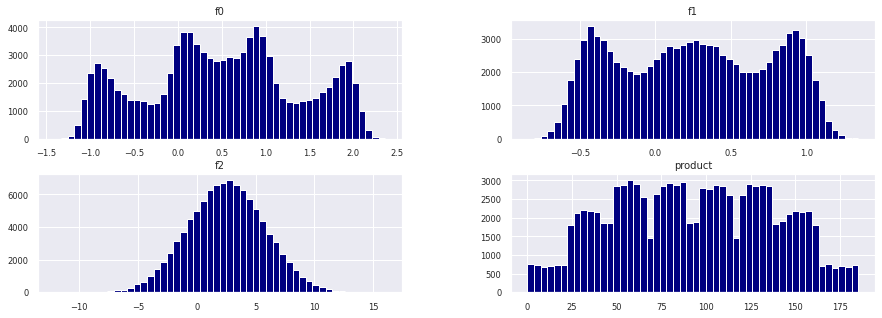

In [16]:
data_info(df_geo_data_0, 15, 5)

##### Выводы подраздела

[К оглавлению](#Оглавление)

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### geo_data_1.csv

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Общая информация о датафрейме .head()



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Соотношение пропусков в датафрейме, %
 id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Общая информация о датафрейме .hist()



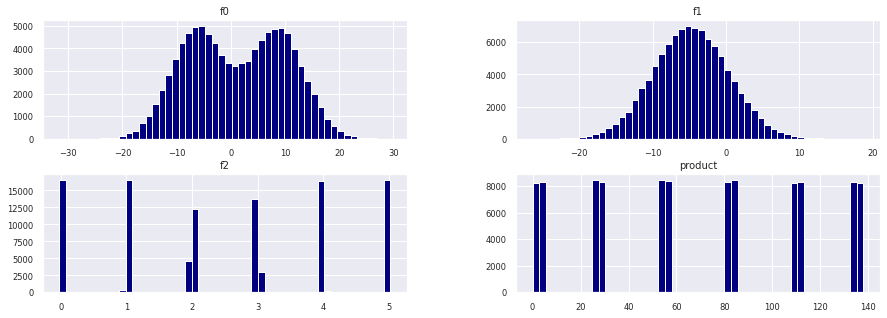

In [17]:
data_info(df_geo_data_1, 15, 5)

##### Выводы подраздела

[К оглавлению](#Оглавление)

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### geo_data_2.csv

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Общая информация о датафрейме .head()



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Соотношение пропусков в датафрейме, %
 id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



Общая информация о датафрейме .hist()



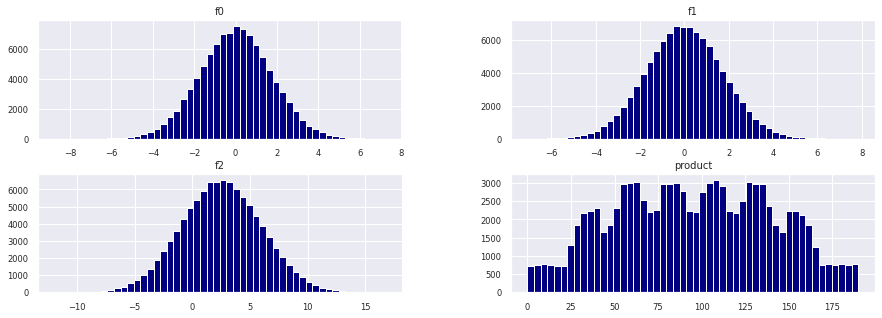

In [18]:
data_info(df_geo_data_2, 15, 5)

##### Выводы подраздела

[К оглавлению](#Оглавление)

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

<a id='chapter_5_10_conlusion'></a>

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)

`geo_data_0.csv`

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

`geo_data_1.csv`

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

`geo_data_2.csv`

**Наименования столбцов:** 
- Наименования корректны, замены наименований не требуется.

**Пропуски данных:** 
- Пропуски в данных не обнаружены

**Тип данных и аномальные значения:**

0.   id      - `object`: тип данных соответствует.
1.   f0      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
2.   f1      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
3.   f2      - `object`: тип данных соответствует. Аномальных значений не обнаружено.
4.   product - `object`: тип данных соответствует. Аномальных значений не обнаружено.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Предобработка данных

[К оглавлению](#Оглавление)

### Замена наименований столбцов

[К оглавлению](#Оглавление)

#### Выводы раздела
[К оглавлению](#Оглавление)

**Замена наименований столбцов**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) замена наименований столбцов не требуется

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Преобразование типов данных

[К оглавлению](#Оглавление)

#### Выводы раздела
[К оглавлению](#Оглавление)

**Преобразование типов данных**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) преобразование типов данных не требуется

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка явных дубликатов

[К оглавлению](#Оглавление)

In [19]:
find_duplicates (DF_LIST, DF_LIST_LABELS)


Количество дубликатов в датафрейме
 df_geo_data_0 :  0

Количество дубликатов в датафрейме
 df_geo_data_1 :  0

Количество дубликатов в датафрейме
 df_geo_data_2 :  0


Проверим количество дубликатов без столбца ID

In [20]:
find_duplicates ([df_geo_data_0.loc[:, 'f0':'product'],
                  df_geo_data_1.loc[:, 'f0':'product'],
                  df_geo_data_2.loc[:, 'f0':'product']], 
                  DF_LIST_LABELS)


Количество дубликатов в датафрейме
 df_geo_data_0 :  0

Количество дубликатов в датафрейме
 df_geo_data_1 :  0

Количество дубликатов в датафрейме
 df_geo_data_2 :  0


Проверим отдельно количество дубликатов в столбце ID

In [21]:
find_duplicates ([df_geo_data_0.loc[:, 'id'],
                  df_geo_data_1.loc[:, 'id'],
                  df_geo_data_2.loc[:, 'id']], 
                  DF_LIST_LABELS)


Количество дубликатов в датафрейме
 df_geo_data_0 :  10

Количество дубликатов в датафрейме
 df_geo_data_1 :  4

Количество дубликатов в датафрейме
 df_geo_data_2 :  4


In [22]:
nice_t(df_geo_data_0[df_geo_data_0['id'].duplicated(keep=False) == True].sort_values(by='id'))

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [23]:
nice_t(df_geo_data_1[df_geo_data_1['id'].duplicated(keep=False) == True].sort_values(by='id'))

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [24]:
nice_t(df_geo_data_2[df_geo_data_2['id'].duplicated(keep=False) == True].sort_values(by='id'))

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Как видно, дубликаты присутствуют, но показатели у этих скважин разные. Возможно, имеет место ошибка в наименовании (идентификаторе скважины). Более того, мы не можем просто "убрать" скважину, так как она может оказаться прибыльной. Заменить наименование самостоятельно мы также не можем, так как это может отрицательно сказаться на бизнес-процессах заказчика. Также при построении моделей столбец 'id' не будет использован, поэтому потребность в удалении данных строк отсутствует.
Необходимо указать заказчику на обнаруженные ошибки в наименовании, чтобы в дальнейшем они были устранены.

#### Выводы раздела
[К оглавлению](#Оглавление)

**Обработка явных дубликатов**

Явных дубликатов не обнаружено

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка неявных дубликатов, опечаток, ошибок, аномальных значений строковых данных

[К оглавлению](#Оглавление)

#### Выводы раздела
[К оглавлению](#Оглавление)

**Обработка неявных дубликатов, опечаток, ошибок, аномальных значений строковых данных**

Строковые данные отсутствуют.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка пропущенных значений

[К оглавлению](#Оглавление)

#### Выводы раздела
[К оглавлению](#Оглавление)

**Обработка пропущенных значений**

Пропущенные значения отсутствуют

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Предварительная обработка аномальных значений

[К оглавлению](#Оглавление)

#### Выводы раздела
[К оглавлению](#Оглавление)

**Предварительная обработка аномальных значений**

Аномальные значения отсутствуют

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)

**Замена наименований столбцов**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) замена наименований столбцов не требуется

**Преобразование типов данных**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) преобразование типов данных не требуется

**Обработка явных дубликатов**

Явных дубликатов не обнаружено

**Обработка неявных дубликатов, опечаток, ошибок, аномальных значений строковых данных**

Строковые данные отсутствуют.

**Обработка пропущенных значений**

Пропущенные значения отсутствуют

**Замена наименований столбцов**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) замена наименований столбцов не требуется

**Предварительная обработка аномальных значений**

Аномальные значения отсутствуют

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Исследовательский анализ данных

#### geo_data_0.csv


Исследование числовых значений


Общая информация о данных (describe)



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


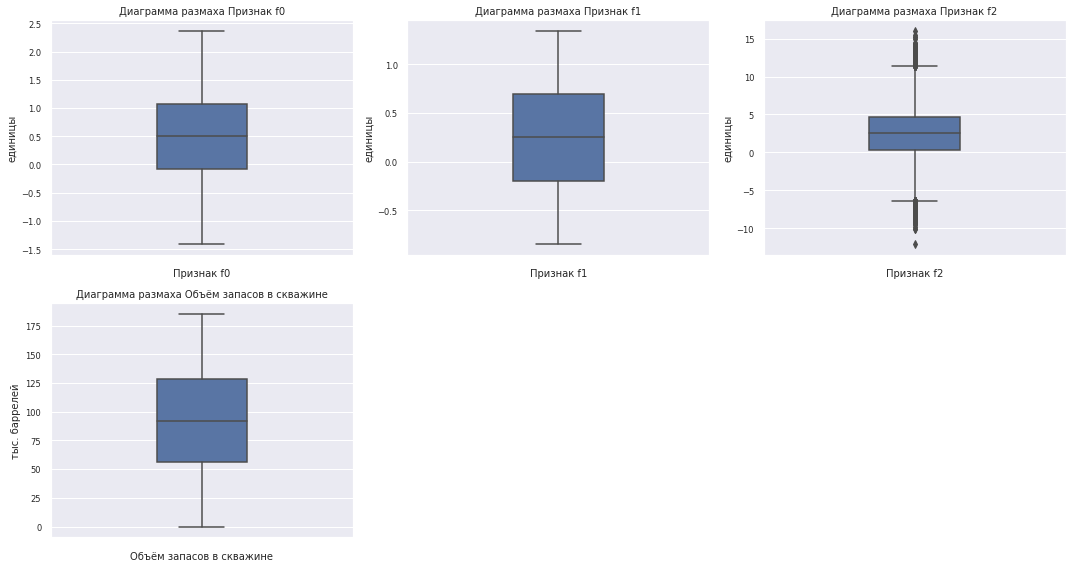

In [25]:
data_numbers_analyze(df_geo_data_0, 
                     ['id'], 
                     DF_X_LABELS, 
                     DF_Y_LABELS, 
                     15, 
                     8)

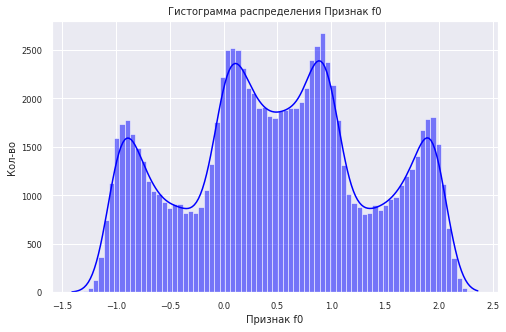

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.972, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


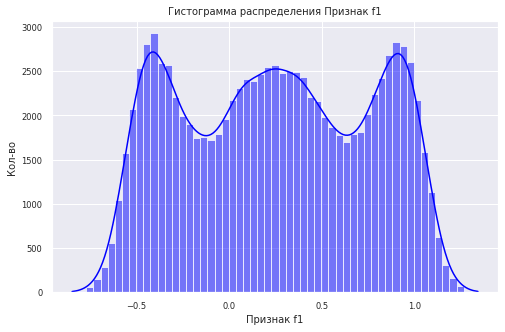

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.957, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


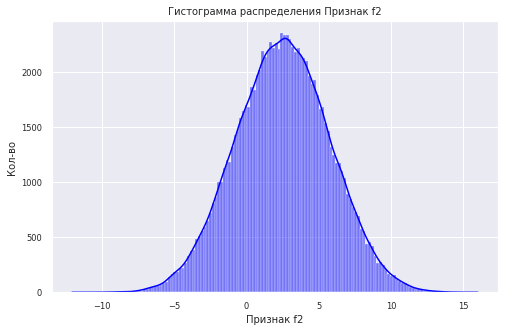

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=1.000, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


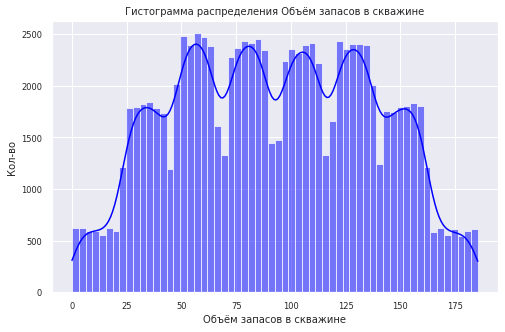

stat=0.979, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
data_hist_analyze(df_geo_data_0, 'id', DF_X_LABELS, DF_Y_LABELS)

В столбце product обнаружены нулевые значения, изучим более подробно

In [27]:
df_geo_data_0.query('product == 0')

,id,f0,f1,f2,product
57263,zCM5W,-0.702064,0.375992,0.236572,0.0


##### Выводы подраздела

[К оглавлению](#Оглавление)

**Категориальные данные**

Категориальные данные отсутствуют

**Количественные данные**

Аномальных значений в данных не обнаружено. В выборке обнаружено также нулевое значение объёмов запасов скважины в количестве одной записи, что слишком мало для корректного обучения модели.

**Распределение количественных данных**

Как видно из графиков, ни один из признаков не обладает нормальным распределением.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### geo_data_1.csv

##### Выводы подраздела

[К оглавлению](#Оглавление)


Исследование числовых значений


Общая информация о данных (describe)



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


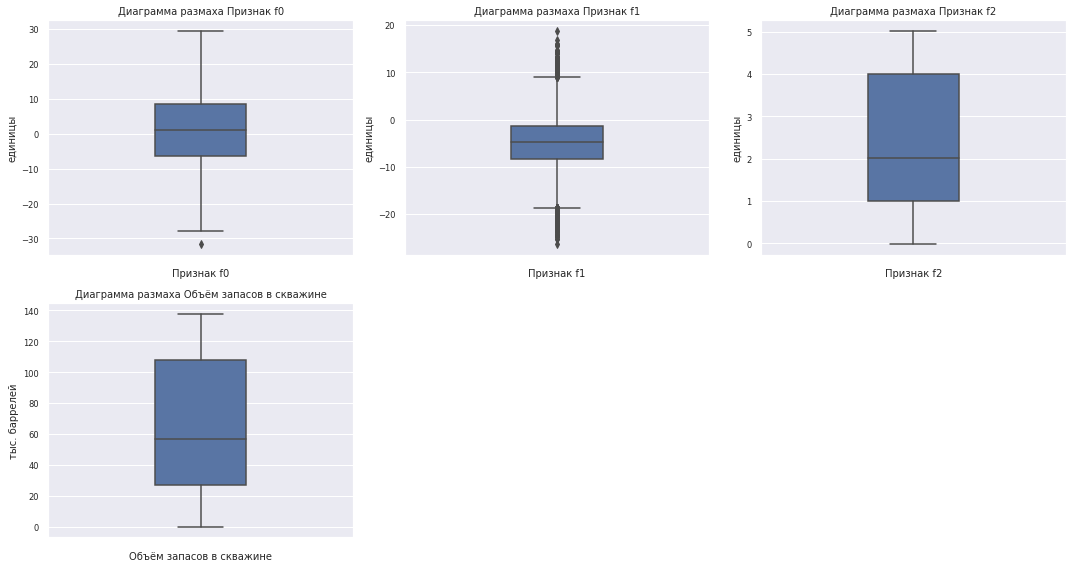

In [28]:
data_numbers_analyze(df_geo_data_1, 
                     ['id'], 
                     DF_X_LABELS, 
                     DF_Y_LABELS, 
                     15, 
                     8)

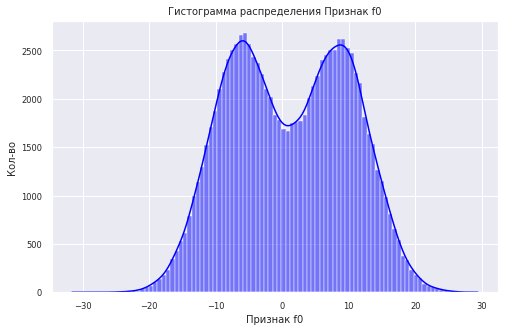

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.978, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


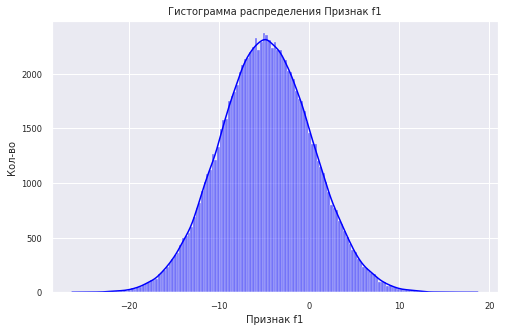

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=1.000, p=0.304

Вероятно, распределение нормальное (Гауссово)


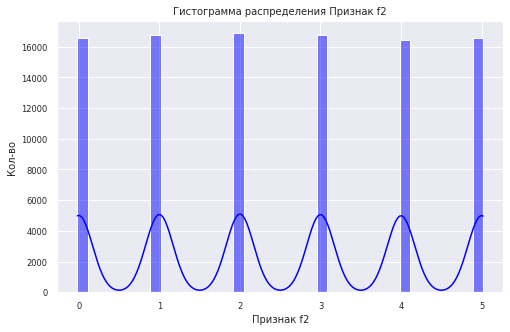

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.908, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


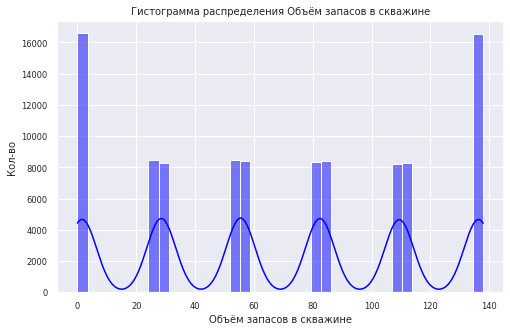

stat=0.919, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
data_hist_analyze(df_geo_data_1, 'id', DF_X_LABELS, DF_Y_LABELS)

In [30]:
df_geo_data_1.query('product == 0')

,id,f0,f1,f2,product
11,OXyvW,16.320755,-0.562946,-0.001783,0.0
13,igmai,6.695604,-0.749449,-0.007630,0.0
62,Qjy5w,21.418478,-5.134490,-0.002836,0.0
63,G6WCj,6.822701,3.104979,-0.000723,0.0
77,MzQhL,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...,...
99936,YrRU8,5.085749,-3.980305,0.005063,0.0
99948,Jbnur,8.277805,-9.178818,0.003275,0.0
99956,aV1cJ,13.343983,-1.290200,0.005980,0.0
99961,Zjbn2,13.854163,-11.528089,-0.005556,0.0


##### Выводы подраздела

[К оглавлению](#Оглавление)

**Категориальные данные**

Категориальные данные отсутствуют

**Количественные данные**

Аномальных значений в данных не обнаружено. В выборке обнаружены также нулевые значения объёмов запасов скважины в количестве 8235 записей.

**Распределение количественных данных**

Как видно из графиков, ни один из признаков не обладает нормальным распределением.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### geo_data_2.csv


Исследование числовых значений


Общая информация о данных (describe)



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


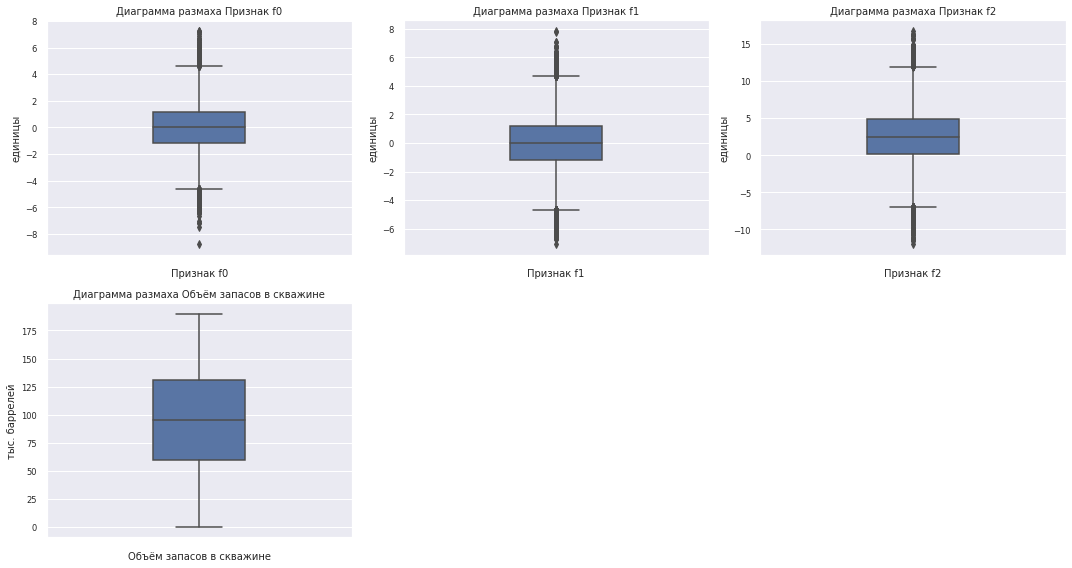

In [31]:
data_numbers_analyze(df_geo_data_2, 
                     ['id'], 
                     DF_X_LABELS, 
                     DF_Y_LABELS, 
                     15, 
                     8)

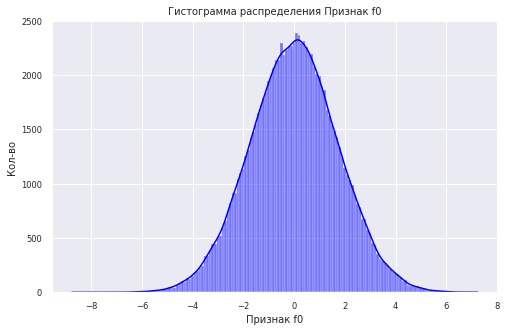

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=1.000, p=0.642

Вероятно, распределение нормальное (Гауссово)


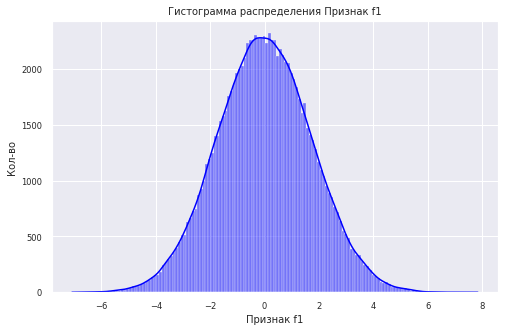

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=1.000, p=0.990

Вероятно, распределение нормальное (Гауссово)


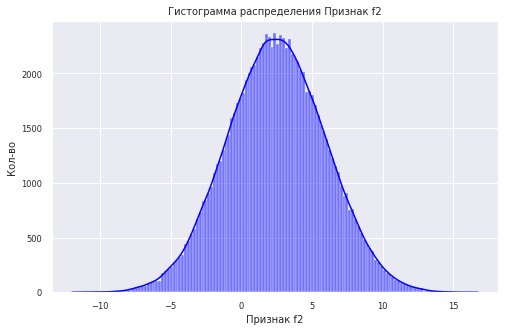

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=1.000, p=0.004

Вероятно, распределение не нормальное (не Гауссово)


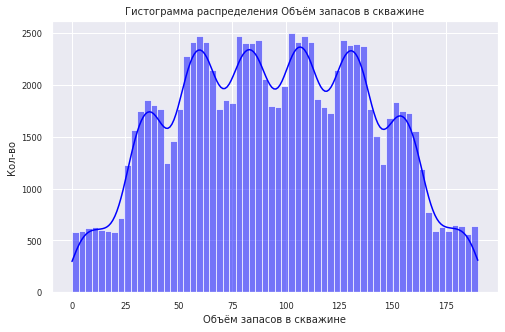

stat=0.983, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
data_hist_analyze(df_geo_data_2, 'id', DF_X_LABELS, DF_Y_LABELS)

In [33]:
df_geo_data_2.query('product == 0')

,id,f0,f1,f2,product
68149,qeefd,-0.865596,-1.615247,-4.126441,0.0


##### Выводы подраздела

[К оглавлению](#Оглавление)

**Категориальные данные**

Категориальные данные отсутствуют

**Количественные данные**

Аномальных значений в данных не обнаружено. В выборке обнаружено также нулевое значение объёмов запасов скважины в количестве одной записи, что слишком мало для корректного обучения модели.

**Распределение количественных данных**

Как видно из графиков, ни один из признаков не обладает нормальным распределением.

#### Сравнение распределений

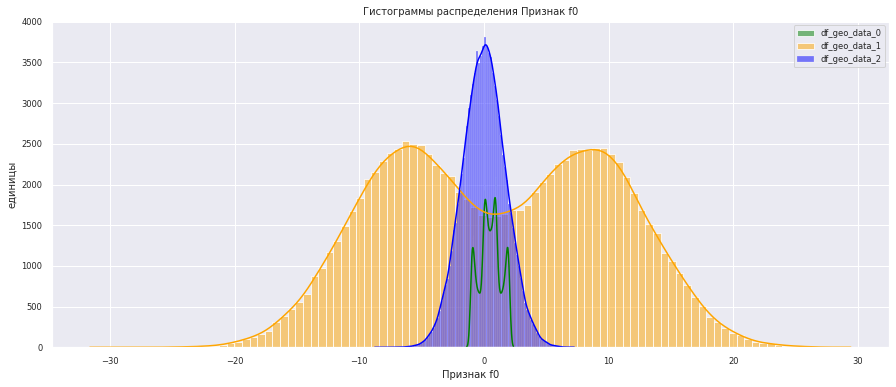

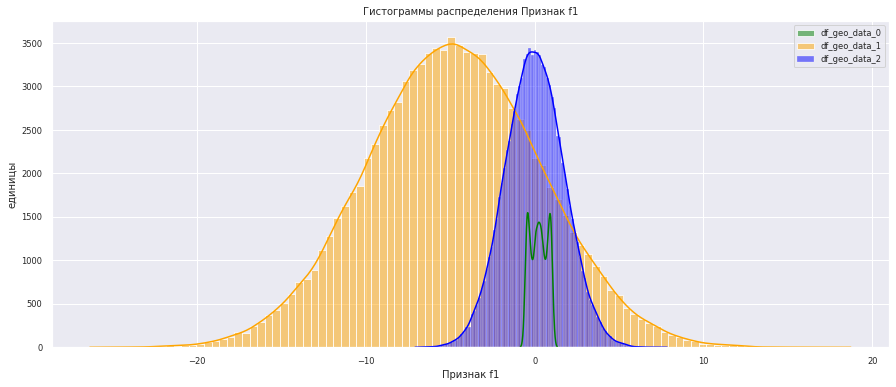

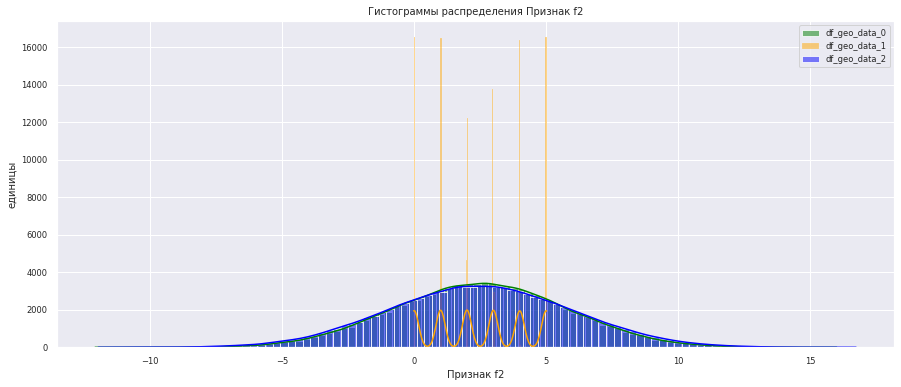

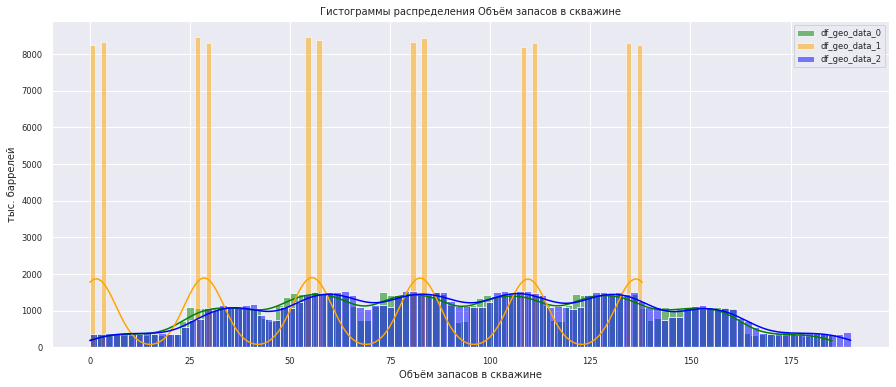

In [34]:
hist_comparison(DF_LIST, DF_LIST_LABELS, 'id', DF_X_LABELS, DF_Y_LABELS)

##### Выводы подраздела

[К оглавлению](#Оглавление)

Как видно из графиков, данные в выборках сильно отличаются, так как значение признаков нам неизвестно, следует обратиться за консультацией к экспертам для разъяснений.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)

**Исследовательский анализ данных**

**Категориальные данные**

Категориальные данные отсутствуют

**Количественные данные**

Аномальных значений в данных не обнаружено.

**Распределение количественных данных**

Как видно из графиков, ни один из признаков не обладает нормальным распределением.

Данные в выборках сильно отличаются, так как значение (сущность) признаков нам неизвестны, следует обратиться за консультацией к экспертам для разъяснений об адекватности данных и их распределений.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Обучение и проверка модели

Обучите и проверьте модель для каждого региона:
- Разбейте данные на обучающую и тестовую выборки в соотношении 75:25.
- Обучите модель и сделайте предсказания на тестовой выборке.
- Сохраните предсказания и правильные ответы на тестовой выборке.
- Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- Проанализируйте результаты.

Создание метрики RMSE

In [35]:
rmse_score = make_scorer(rmse, greater_is_better = False)

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### geo_data_0.csv

In [36]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    df_geo_data_0.drop(['product', 'id'], axis=1),
    df_geo_data_0['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)

In [37]:
for name, df in {'X_train_0' : X_train_0, 'X_test_0' : X_test_0, 'y_train_0' : y_train_0, 'y_test_0' : y_test_0}.items():
    print(f'Размерность датафрейма {name} : {df.shape}')

Размерность датафрейма X_train_0 : (75000, 3)
Размерность датафрейма X_test_0 : (25000, 3)
Размерность датафрейма y_train_0 : (75000,)
Размерность датафрейма y_test_0 : (25000,)


Подготовка пайплайна

In [38]:
#создадим списки количественных признаков
 
num_col = ['f0', 
           'f1', 
           'f2'] 

# Pipeline для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('num', MinMaxScaler(), num_col)
    ], 
    remainder='passthrough'
)

In [39]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])
 
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough'], 
    'models': [LinearRegression()]
}
 
grid_0 = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=rmse_score, 
    n_jobs=-1
)
grid_0.fit(X_train_0, y_train_0)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'f2'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid={'models': [LinearRegression()],
                         'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               RobustScaler(), 'passthrough']},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [40]:
print('Лучшая модель и её параметры:\n\n', grid_0.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])


In [41]:
# проверка работы модели на тестовой выборке
# рассчет прогноза на тестовых данных
y_test_pred_0 = grid_0.best_estimator_.predict(X_test_0)
avg_product_0 = sum(y_test_pred_0) / len(y_test_pred_0)

In [42]:
print ('\nМетрика RMSE лучшей модели на кросс-валидационной выборке:', -grid_0.best_score_)
print(f'\nМетрика RMSE на тестовой выборке: {rmse(y_test_pred_0, y_test_0)}')
print(f'\nСредний запас предсказанного сырья, тыс. баррелей: {avg_product_0}')


Метрика RMSE лучшей модели на кросс-валидационной выборке: 37.67200536313506

Метрика RMSE на тестовой выборке: 37.75660035026169

Средний запас предсказанного сырья, тыс. баррелей: 92.3987999065781


<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### geo_data_1.csv

In [43]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    df_geo_data_1.drop(['product', 'id'], axis=1),
    df_geo_data_1['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)

In [44]:
for name, df in {'X_train_1' : X_train_1, 'X_test_1' : X_test_1, 'y_train_1' : y_train_1, 'y_test_1' : y_test_1}.items():
    print(f'Размерность датафрейма {name} : {df.shape}')

Размерность датафрейма X_train_1 : (75000, 3)
Размерность датафрейма X_test_1 : (25000, 3)
Размерность датафрейма y_train_1 : (75000,)
Размерность датафрейма y_test_1 : (25000,)


Подготовка пайплайна

In [45]:
grid_1 = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=rmse_score, 
    n_jobs=-1
)
grid_1.fit(X_train_1, y_train_1)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'f2'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid={'models': [LinearRegression()],
                         'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               RobustScaler(), 'passthrough']},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [46]:
print('Лучшая модель и её параметры:\n\n', grid_1.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])


In [47]:
# проверка работы модели на тестовой выборке
# рассчет прогноза на тестовых данных
y_test_pred_1 = grid_1.best_estimator_.predict(X_test_1)
avg_product_1 = sum(y_test_pred_1) / len(y_test_pred_1)

In [48]:
print ('\nМетрика RMSE лучшей модели на кросс-валидационной выборке:', -grid_1.best_score_)
print(f'\nМетрика RMSE на тестовой выборке: {rmse(y_test_pred_1, y_test_1)}')
print(f'\nСредний запас предсказанного сырья, тыс. баррелей: {avg_product_1}')


Метрика RMSE лучшей модели на кросс-валидационной выборке: 0.8904559629285671

Метрика RMSE на тестовой выборке: 0.8902801001028846

Средний запас предсказанного сырья, тыс. баррелей: 68.7128780391376


<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### geo_data_2.csv

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df_geo_data_2.drop(['product', 'id'], axis=1),
    df_geo_data_2['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)

In [50]:
for name, df in {'X_train_2' : X_train_2, 'X_test_2' : X_test_2, 'y_train_2' : y_train_2, 'y_test_2' : y_test_2}.items():
    print(f'Размерность датафрейма {name} : {df.shape}')

Размерность датафрейма X_train_2 : (75000, 3)
Размерность датафрейма X_test_2 : (25000, 3)
Размерность датафрейма y_train_2 : (75000,)
Размерность датафрейма y_test_2 : (25000,)


Подготовка пайплайна

In [51]:
grid_2 = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=rmse_score, 
    n_jobs=-1
)
grid_2.fit(X_train_2, y_train_2)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'f2'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid={'models': [LinearRegression()],
                         'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               RobustScaler(), 'passthrough']},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [52]:
print('Лучшая модель и её параметры:\n\n', grid_2.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])


In [53]:
# проверка работы модели на тестовой выборке
# рассчет прогноза на тестовых данных
y_test_pred_2 = grid_2.best_estimator_.predict(X_test_2)
avg_product_2 = sum(y_test_pred_2) / len(y_test_pred_2)

In [54]:
print ('\nМетрика RMSE лучшей модели на кросс-валидационной выборке:', -grid_2.best_score_)
print(f'\nМетрика RMSE на тестовой выборке: {rmse(y_test_pred_2, y_test_2)}')
print(f'\nСредний запас предсказанного сырья, тыс. баррелей: {avg_product_2}')


Метрика RMSE лучшей модели на кросс-валидационной выборке: 40.02698159997838

Метрика RMSE на тестовой выборке: 40.145872311342174

Средний запас предсказанного сырья, тыс. баррелей: 94.77102387765993


Сохраним датафреймы с предсказанными и фактическими значениями

In [55]:
df_geo_calc_0 = pd.DataFrame()
df_geo_calc_0['pred'] = pd.Series(y_test_pred_0)
df_geo_calc_0['test'] = y_test_0.reset_index(drop=True)

In [56]:
df_geo_calc_1 = pd.DataFrame()
df_geo_calc_1['pred'] = pd.Series(y_test_pred_1)
df_geo_calc_1['test'] = y_test_1.reset_index(drop=True)

In [57]:
df_geo_calc_2 = pd.DataFrame()
df_geo_calc_2['pred'] = pd.Series(y_test_pred_2)
df_geo_calc_2['test'] = y_test_2.reset_index(drop=True)

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)

**Обучение и проверка моделей**

Было обучено три модели для каждого из регионов, подсчитаны метрики RMSE.

**geo_data_0.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 37.67200536313506

Метрика RMSE на тестовой выборке: 37.75660035026169

Средний запас предсказанного сырья, тыс. баррелей: 92.3987999065781

**geo_data_1.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 0.8904559629285671

Метрика RMSE на тестовой выборке: 0.8902801001028846

Средний запас предсказанного сырья, тыс. баррелей: 68.7128780391376


**geo_data_2.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 40.02698159997838

Метрика RMSE на тестовой выборке: 40.145872311342174

Средний запас предсказанного сырья, тыс. баррелей: 94.77102387765993

Чем ниже RMSE, тем лучше модель соответствует набору данных.
Таким образом, наиболее предсказумое поведение будет у второй модели.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Подготовка к расчёту прибыли

 - Все ключевые значения для расчётов сохраните в отдельных переменных.
 - Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
 - Напишите выводы по этапу подготовки расчёта прибыли.

Расчитаем достаточный объём сырья для безубыточной разработки новой скважины. 

In [58]:
oil_vol_total = BUDGET / INCOME_PER_UNIT
print(round(oil_vol_total, 2))

22222.22


По условиям заказчика, при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [59]:
min_oil_per_well = oil_vol_total / BEST_OIL_WELL_Q_TY
print(round(min_oil_per_well,2))

111.11


Сравним полученный объём сырья со средним запасом в каждом регионе. Отрицательное значение будет означать, что среднее значение запасов ниже необходимого

In [60]:
print(f'Разница минимально требуемого объёма скважины и среднего предсказанного для региона 1:\
      {round(avg_product_0-min_oil_per_well,2)}')
print(f'Разница минимально требуемого объёма скважины и среднего предсказанного для региона 2:\
      {round(avg_product_1-min_oil_per_well,2)}')
print(f'Разница минимально требуемого объёма скважины и среднего предсказанного для региона 3:\
      {round(avg_product_2-min_oil_per_well,2)}')

Разница минимально требуемого объёма скважины и среднего предсказанного для региона 1:      -18.71
Разница минимально требуемого объёма скважины и среднего предсказанного для региона 2:      -42.4
Разница минимально требуемого объёма скважины и среднего предсказанного для региона 3:      -16.34


Рассмотрим только 200 скважин с наибольшим предсказанным объёмом

In [61]:
best_200_product_0 = sum(pd.Series(y_test_pred_0).sort_values().tail(200)) \
                   / len(pd.Series(y_test_pred_0).sort_values().tail(200))

best_200_product_1 = sum(pd.Series(y_test_pred_1).sort_values().tail(200)) \
                   / len(pd.Series(y_test_pred_1).sort_values().tail(200))

best_200_product_2 = sum(pd.Series(y_test_pred_2).sort_values().tail(200)) \
                   / len(pd.Series(y_test_pred_2).sort_values().tail(200))

In [62]:
print(f'Разница минимально требуемого объёма скважины и предсказанного для региона 1: \
      {round(best_200_product_0-min_oil_per_well,2)}')
print(f'Разница минимально требуемого объёма скважины и предсказанного для региона 2: \
      {round(best_200_product_1-min_oil_per_well,2)}')
print(f'Разница минимально требуемого объёма скважины и предсказанного для региона 3: \
      {round(best_200_product_2-min_oil_per_well,2)}')

Разница минимально требуемого объёма скважины и предсказанного для региона 1:       43.3
Разница минимально требуемого объёма скважины и предсказанного для региона 2:       27.63
Разница минимально требуемого объёма скважины и предсказанного для региона 3:       37.53


<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)

**Подготовка к расчёту прибыли**

Расчитан условный минимальный объём сырья для безубыточной разработки, он составил 111.11 тыс. баррелей с одной скважины. При этом, если рассматривать средние значения предсказанных показателей добычи для каждого из регионов, объёма нефти не хватит, чтобы окупить вложения. Но если рассматривать только 200 наилучших по показателям объёма скважин, то этого объёма хватит, чтобы покрыть расходы

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберите скважины с максимальными значениями предсказаний. 
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.

In [63]:
oil_wells_income = oil_wells_income_calc([y_test_pred_0, y_test_pred_1, y_test_pred_2], 
                                         ['Регион 1', 'Регион 2', 'Регион 3'], 
                                         INCOME_PER_UNIT, 
                                         BUDGET)
print(oil_wells_income)

  наименование_региона  прибыль_млрд
0             Регион 1      3.896658
1             Регион 2      2.486938
2             Регион 3      3.377982


**Посчитаем риски и прибыль для каждого региона**
- Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Регион 1
Величина средней прибыли: 0.41 млрд.
0.025 квантиль: -0.12
0.975 квантиль: 0.91
Вероятность убытка: 6.70 %


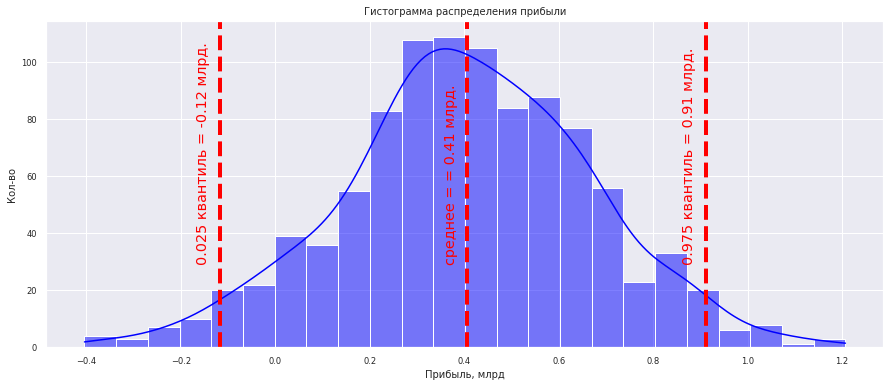

In [64]:
print('Регион 1')
bootstrap_calc(df_geo_calc_0, 'test', 'pred', 200, 500, INCOME_PER_UNIT, BUDGET)

Регион 2
Величина средней прибыли: 0.43 млрд.
0.025 квантиль: 0.02
0.975 квантиль: 0.82
Вероятность убытка: 1.90 %


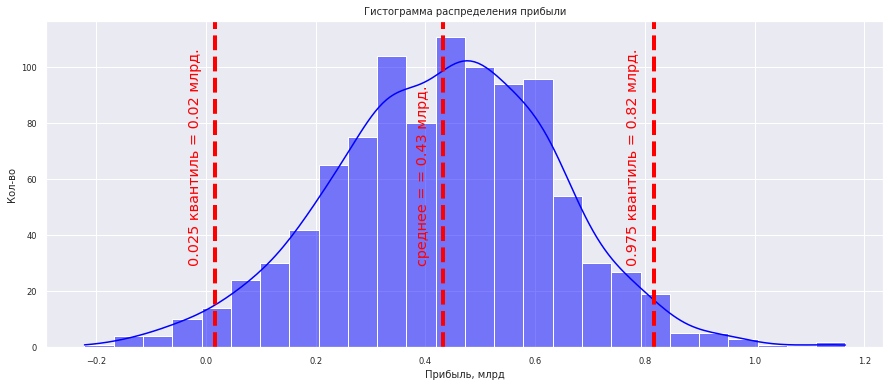

In [65]:
print('Регион 2')
bootstrap_calc(df_geo_calc_1, 'test', 'pred', 200, 500, INCOME_PER_UNIT, BUDGET)

<a id='oshibka'></a>

Регион 3
Величина средней прибыли: 0.38 млрд.
0.025 квантиль: -0.17
0.975 квантиль: 0.90
Вероятность убытка: 7.40 %


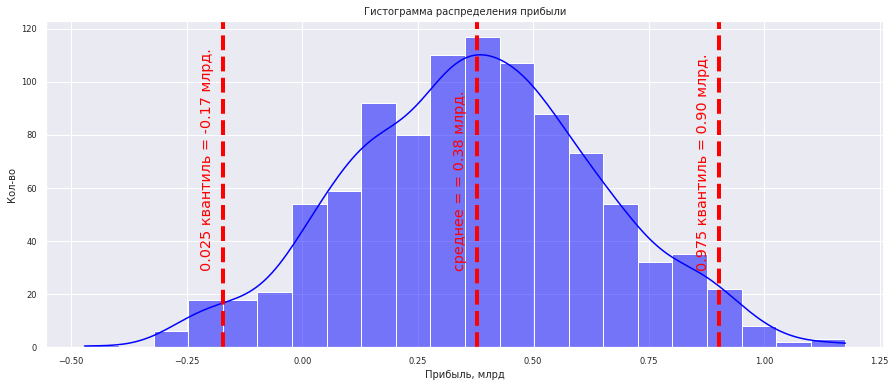

In [66]:
print('Регион 3')
bootstrap_calc(df_geo_calc_2, 'test', 'pred', 200, 500, INCOME_PER_UNIT, BUDGET)

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Выводы главы

[К оглавлению](#Оглавление)


**Расчёт прибыли и рисков**

- Применена техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдена среднюю прибыль, 95%-й доверительный интервал и риск убытков. 

Регион 1
Величина средней прибыли: 0.406 млрд.
0.025 квантиль: -0.12
0.975 квантиль: 0.91
Вероятность убытка: 7.00 %

Регион 2
Величина средней прибыли: 0.433 млрд.
0.025 квантиль: 0.02
0.975 квантиль: 0.82
Вероятность убытка: 2.0 %

Регион 3
Величина средней прибыли: 0.377 млрд.
0.025 квантиль: -0.17
0.975 квантиль: 0.9
Вероятность убытка: 7.00 %

Наиболее подходящим для разработки является второй регион, так как обладает наименьшими рисками и наибольшей средней прибылью.

## Общий вывод

В рамках выполнения целей проекта были выполнены все поставленные задачи.

- **Предобработка данных:**

**Замена наименований столбцов**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) замена наименований столбцов не требуется

**Преобразование типов данных**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) преобразование типов данных не требуется

**Обработка явных дубликатов**

Дубликаты присутствуют в столбце `id` для всех датасетов, но показатели у этих скважин разные. Возможно, имеет место ошибка в наименовании (идентификаторе скважины), это не повлияло на построение модели и выбор скважин, но в дальнейшем следует исправить эти ошибки.

**Обработка неявных дубликатов, опечаток, ошибок, аномальных значений строковых данных**

Строковые данные отсутствуют.

**Обработка пропущенных значений**

Пропущенные значения отсутствуют

**Замена наименований столбцов**

В соответствии с [выводами главы 5.10](#chapter_5_10_conlusion) замена наименований столбцов не требуется

**Предварительная обработка аномальных значений**

Аномальные значения отсутствуют

- **Исследовательский анализ данных:**

**Исследовательский анализ данных**

**Категориальные данные**

Категориальные данные отсутствуют

**Количественные данные**

Аномальных значений в данных не обнаружено.

**Распределение количественных данных**

Как видно из графиков, ни один из признаков не обладает нормальным распределением.

Данные в выборках сильно отличаются, так как значение (сущность) признаков нам неизвестны, следует обратиться за консультацией к экспертам для разъяснений об адекватности данных и их распределений.

- **Обучение и проверка моделей**

Было обучено три модели для каждого из регионов, подсчитаны метрики RMSE.

**geo_data_0.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 37.67200536313506

Метрика RMSE на тестовой выборке: 37.75660035026169

Средний запас предсказанного сырья, тыс. баррелей: 92.3987999065781

**geo_data_1.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 0.8904559629285671

Метрика RMSE на тестовой выборке: 0.8902801001028846

Средний запас предсказанного сырья, тыс. баррелей: 68.7128780391376


**geo_data_2.csv**

Метрика RMSE лучшей модели на кросс-валидационной выборке: 40.02698159997838

Метрика RMSE на тестовой выборке: 40.145872311342174

Средний запас предсказанного сырья, тыс. баррелей: 94.77102387765993

Чем ниже RMSE, тем лучше модель соответствует набору данных.
Таким образом, наиболее предсказумое поведение будет у второй модели.

- **Подготовка к расчёту прибыли**

Расчитан условный минимальный объём сырья для безубыточной разработки, он составил 111.11 тыс. баррелей с одной скважины. При этом, если рассматривать средние значения предсказанных показателей добычи для каждого из регионов, объёма нефти не хватит, чтобы окупить вложения. Но если рассматривать только 200 наилучших по показателям объёма скважин, то этого объёма хватит, чтобы покрыть расходы



- **Расчёт прибыли и рисков**

- Применена техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдена среднюю прибыль, 95%-й доверительный интервал и риск убытков. 

**Регион 1**
Величина средней прибыли: 0.406 млрд.

0.025 квантиль: -0.12

0.975 квантиль: 0.91

Вероятность убытка: 7.00 %

**Регион 2**

Величина средней прибыли: 0.433 млрд.

0.025 квантиль: 0.02

0.975 квантиль: 0.82

Вероятность убытка: 2.0 %

**Регион 3**

Величина средней прибыли: 0.377 млрд.

0.025 квантиль: -0.17

0.975 квантиль: 0.9

Вероятность убытка: 7.00 %

Наиболее подходящим для разработки является второй регион, так как обладает наименьшими рисками и наибольшей средней прибылью.